<a href="https://colab.research.google.com/github/Statistically-Inclined/NLP-Spam_Classification/blob/main/E-MailSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
print('Libraries Imported')

Libraries Imported


In [5]:
df_nlp = pd.read_csv('emails.csv')
df = df_nlp.copy()

In [6]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [8]:
df.shape

(5728, 2)

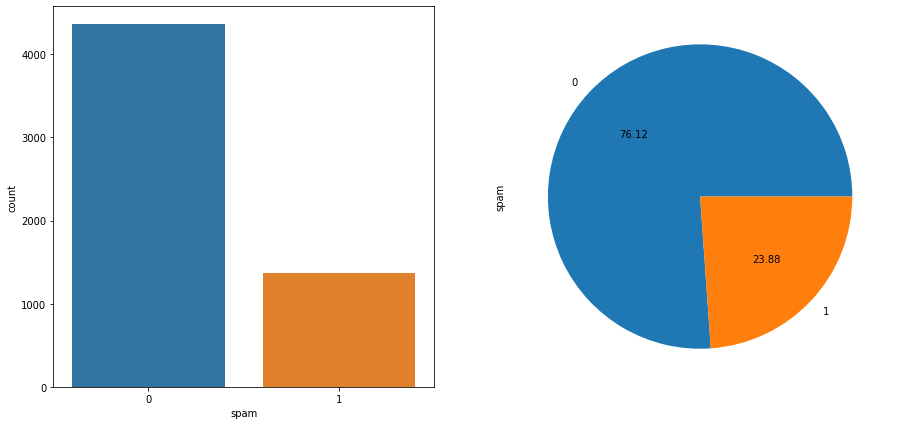

In [11]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
sns.countplot(df['spam'])
plt.subplot(1,2,2)
df['spam'].value_counts().plot(kind='pie', autopct='%.2f')

In [12]:
df['length'] = df['text'].apply(len)

In [13]:
df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


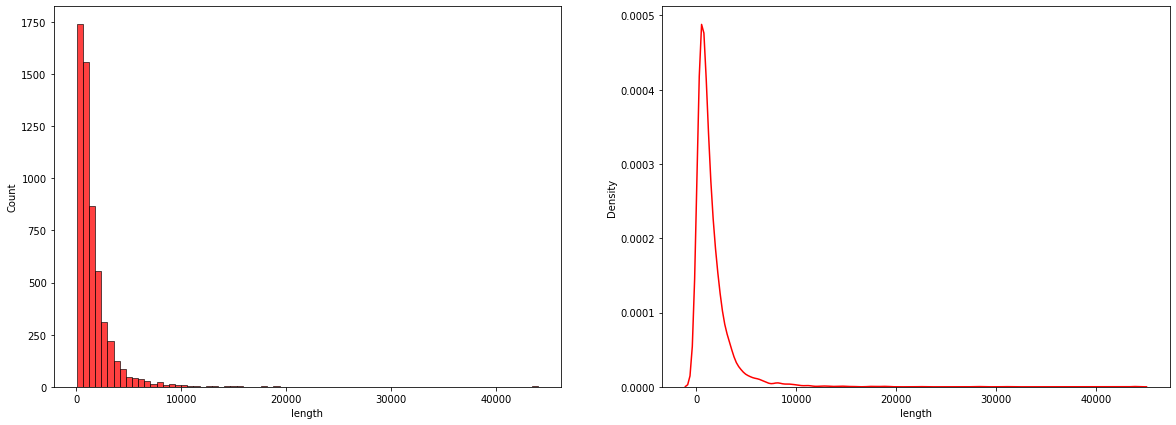

In [15]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.histplot(df['length'], bins=75, color='red')
plt.subplot(1,2,2)
sns.distplot(df['length'], bins=75, color='red', hist=False)

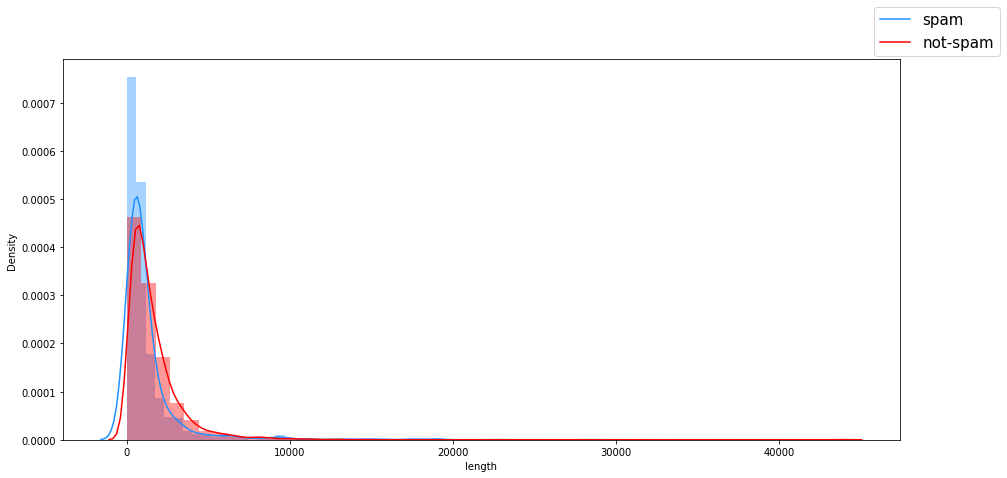

In [77]:
a = plt.figure(figsize=(15,7))
sns.distplot(df[df['spam']==1]['length'], color='dodgerblue', hist=True)
sns.distplot(df[df['spam']==0]['length'], color='red', hist=True)
labels = ['spam', 'not-spam']
a.legend(labels, fontsize=15)

In [17]:
df.describe()

,spam,length
count,5728.000000,5728.000000
mean,0.238827,1556.768680
std,0.426404,2042.649812
min,0.000000,13.000000
25%,0.000000,508.750000
50%,0.000000,979.000000
75%,0.000000,1894.250000
max,1.000000,43952.000000


In [18]:
spam = df[df['spam'] == 1]

In [19]:
spam.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [20]:
spam.describe()

,spam,length
count,1368.0,1368.000000
mean,1.0,1317.257310
std,0.0,2271.372893
min,1.0,18.000000
25%,1.0,401.500000
50%,1.0,693.500000
75%,1.0,1250.250000
max,1.0,28432.000000


In [21]:
ham = df[df['spam'] == 0]

In [22]:
ham.head()

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535


In [23]:
ham.describe()

,spam,length
count,4360.0,4360.000000
mean,0.0,1631.918119
std,0.0,1959.664549
min,0.0,13.000000
25%,0.0,577.750000
50%,0.0,1122.000000
75%,0.0,2037.250000
max,0.0,43952.000000


In [24]:
spam[spam['length'] == 18]['text'].iloc[0]

'Subject: . jif  . '

In [25]:
spam[spam['length'] == 28432]['text'].iloc[0]

'Subject: make thousands just sending emails . it \' s easy .  from : @ yahoo . com  to :  subject : earn money sending e - mails . it \' s easy !  new improved reports  dear friend ,  you can earn a lot of money in the next 90 days sending e - mail .  seem impossible ? is there a catch ? no , there is no catch ; just  send your e - mails and be on your way to financial freedom .  basically , i send out as many of these e - mails as i can , then  people send me cash in the mail for information that i just e - mail  back to them . everyday , i make a three minute drive to my p . o . box  knowing that there are at least a few hundred dollars waiting for  me . and the best part , it is completely legal .  just read the next few paragraphs and see what you think . if you  like what you read , great ! if you don \' t , read it again because you  must have missed something .  " as seen on national television "  " making over a half million dollars every 6 months from your home  for an invest

In [26]:
ham[ham['length'] == 13]['text'].iloc[0]

'Subject: fyi '

In [27]:
ham[ham['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

### **Preprocessing of the text**

### **Example:**

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
sentence = "My name is - Nasim Thander / Novel, Am I great scientist ?? Definitely Yes !!!"

In [30]:
text_punc = [text for text in sentence if text  not in string.punctuation]

In [31]:
text_punc

['M',
 'y',
 ' ',
 'n',
 'a',
 'm',
 'e',
 ' ',
 'i',
 's',
 ' ',
 ' ',
 'N',
 'a',
 's',
 'i',
 'm',
 ' ',
 'T',
 'h',
 'a',
 'n',
 'd',
 'e',
 'r',
 ' ',
 ' ',
 'N',
 'o',
 'v',
 'e',
 'l',
 ' ',
 'A',
 'm',
 ' ',
 'I',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 's',
 'c',
 'i',
 'e',
 'n',
 't',
 'i',
 's',
 't',
 ' ',
 ' ',
 'D',
 'e',
 'f',
 'i',
 'n',
 'i',
 't',
 'e',
 'l',
 'y',
 ' ',
 'Y',
 'e',
 's',
 ' ']

In [32]:
text_punc_string = ''.join(text_punc)

In [33]:
text_punc_string

'My name is  Nasim Thander  Novel Am I great scientist  Definitely Yes '

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
text_punc_string_stopword = [word for word in text_punc_string.split() if word.lower() not in stopwords.words('english')]

In [37]:
text_punc_string_stopword

['name',
 'Nasim',
 'Thander',
 'Novel',
 'great',
 'scientist',
 'Definitely',
 'Yes']

In [38]:
text_punc_string_stopword_join = ' '.join(text_punc_string_stopword)

In [39]:
text_punc_string_stopword_join

'name Nasim Thander Novel great scientist Definitely Yes'

In [41]:
def text_cleaning(text):
  text_punc_removed = [char for char in text if char not in string.punctuation ]
  text_punc_removed_join = ''.join(text_punc_removed)
  text_punc_removed_join_clean = [word for word in text_punc_removed_join.split() if word.lower() not in stopwords.words('english') ]
  text_punc_removed_join_clean_final = ' '.join(text_punc_removed_join_clean)
  return text_punc_removed_join_clean_final

In [42]:
df['clean_text'] = df['text'].apply(text_cleaning)

In [43]:
df.head()

,text,spam,length,clean_text
0,Subject: naturally irresistible your corporate...,1,1484,Subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,598,Subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,448,Subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,500,Subject 4 color printing special request addit...
4,"Subject: do not have money , get software cds ...",1,235,Subject money get software cds software compat...


In [44]:
df['clean_text'].head()

0    Subject naturally irresistible corporate ident...
1    Subject stock trading gunslinger fanny merrill...
2    Subject unbelievable new homes made easy im wa...
3    Subject 4 color printing special request addit...
4    Subject money get software cds software compat...
Name: clean_text, dtype: object

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
df_cv = cv.fit_transform(df['clean_text'])

In [46]:
print(cv.get_feature_names())

['00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', 

In [47]:
df_cv.shape

(5728, 37187)

In [48]:
X = df_cv
y = df['spam'].values

In [49]:
X.shape

(5728, 37187)

In [50]:
y.shape

(5728,)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

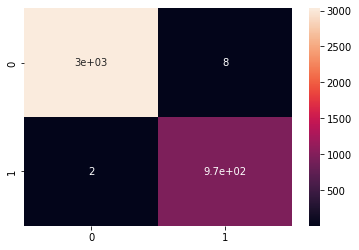

In [54]:
y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

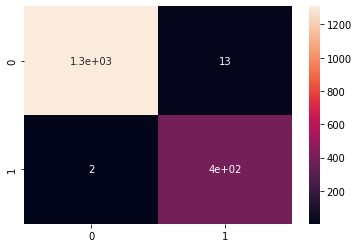

In [55]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [56]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1322
           1       0.97      0.99      0.98       397

    accuracy                           0.99      1719
   macro avg       0.98      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



In [59]:
print(accuracy_score(y_test, y_predict_test))

0.9912739965095986


In [71]:
def predict_outcome(message):
  testing_sample_countvectorizer = cv.transform(message)
  test_predict = NB_classifier.predict(testing_sample_countvectorizer)
  # print(test_predict)
  if test_predict[0] == 1:
    print('spam')
  else:
    print('ham')

In [83]:
message1 = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
message2 = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']
message3 = ['Hi Team, This is Nasim Thander. I am going to resign from TCS and joing GOOGLE as a Senior Data Scientist with a package of 50LPA ']

In [84]:
predict_outcome(message1)

spam


In [85]:
predict_outcome(message2)

ham


In [86]:
predict_outcome(message3)

ham


In [100]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
df_tfidf = tfidf.fit_transform(df_cv)

In [91]:
df_tfidf.shape

(5728, 37187)

In [92]:
X = df_tfidf
y = df['spam'].values

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [94]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

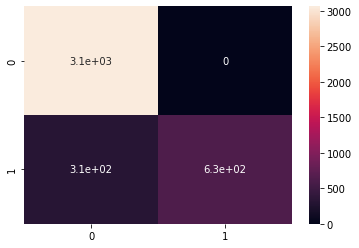

In [96]:
y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

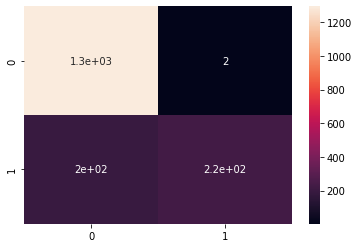

In [97]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [98]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1297
           1       0.99      0.53      0.69       422

    accuracy                           0.88      1719
   macro avg       0.93      0.77      0.81      1719
weighted avg       0.90      0.88      0.87      1719

